In [1]:
!pip install Xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [70]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
import lightgbm as lgm
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")

In [3]:
train_df=pd.read_csv("Titanic_train.csv") # reading train data frame

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df=pd.read_csv("Titanic_test.csv")

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.shape

(891, 12)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe() # statastica calculus of numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.duplicated().sum() # finding the no.of duplicated

np.int64(0)

In [11]:
train_df.isnull().sum() # finding the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
 train_df['Survived'].value_counts() # checking the imbalance in the data 

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train_df['Embarked'].fillna(train_df['Embarked'].mode(),inplace=True) # impute the null values with mean

In [14]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

In [15]:
train_df.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True) # Dropping unnecessaryy columns

In [16]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
train_df.dtypes # checking data types

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
# changing the data type as needed for the model

In [19]:
train_df['Pclass']=train_df['Pclass'].astype('category')

In [20]:
train_df['SibSp']=train_df['SibSp'].astype('category')

In [21]:
train_df['Parch']=train_df['Parch'].astype('category')

In [22]:
train_df.dtypes

Survived       int64
Pclass      category
Sex           object
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked      object
dtype: object

### countplot b/w catagorical columns and survived(taget) column

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


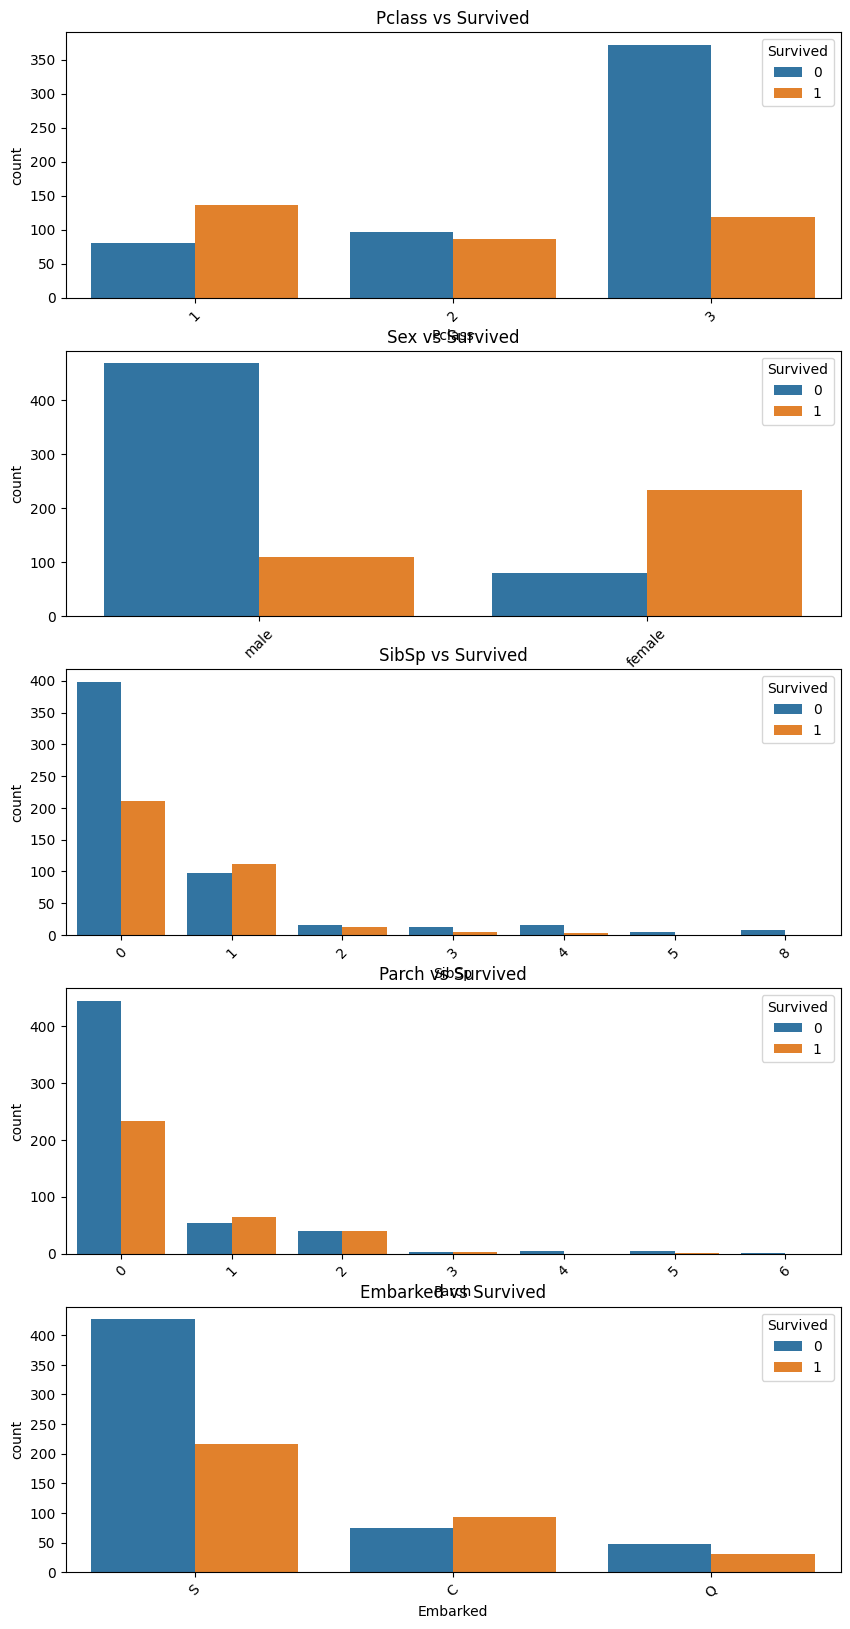

In [23]:
features=[col for col in train_df.columns if train_df[col].dtypes in ['object','category'] and col!='Survived'] 
print(features)
fig, axes = plt.subplots(len(features), 1, figsize=(10, 4*len(features)))
for i,col in enumerate(features):
    sns.countplot(x=train_df[col],hue='Survived',data=train_df,ax=axes[i])
    axes[i].set_title(f'{col} vs Survived')
    axes[i].tick_params(axis='x', rotation=45)

## Box plot for the numerical columns

['Age', 'Fare']


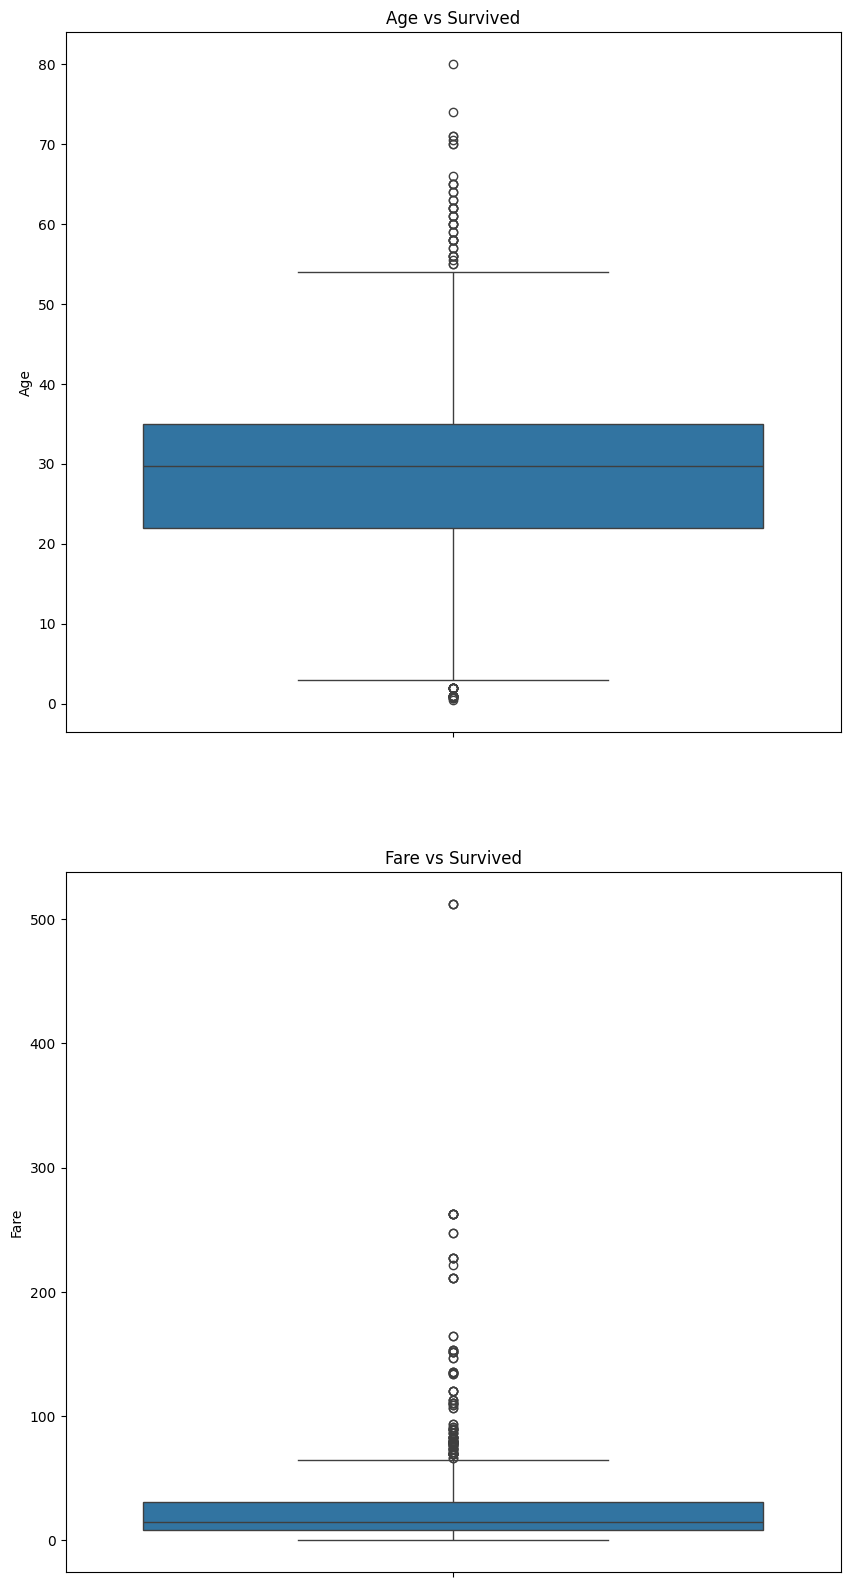

In [24]:
num_features=[col for col in train_df.columns if train_df[col].dtypes in ['int','float'] and col!='Survived']  
print(num_features)
fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 4*len(features)))
for i,col in enumerate(num_features):
    sns.boxplot(train_df[col],ax=axes[i])
    axes[i].set_title(f'{col} vs Survived')
    axes[i].tick_params(axis='x', rotation=45)

## Hist plot for numerical columns

['Age', 'Fare']


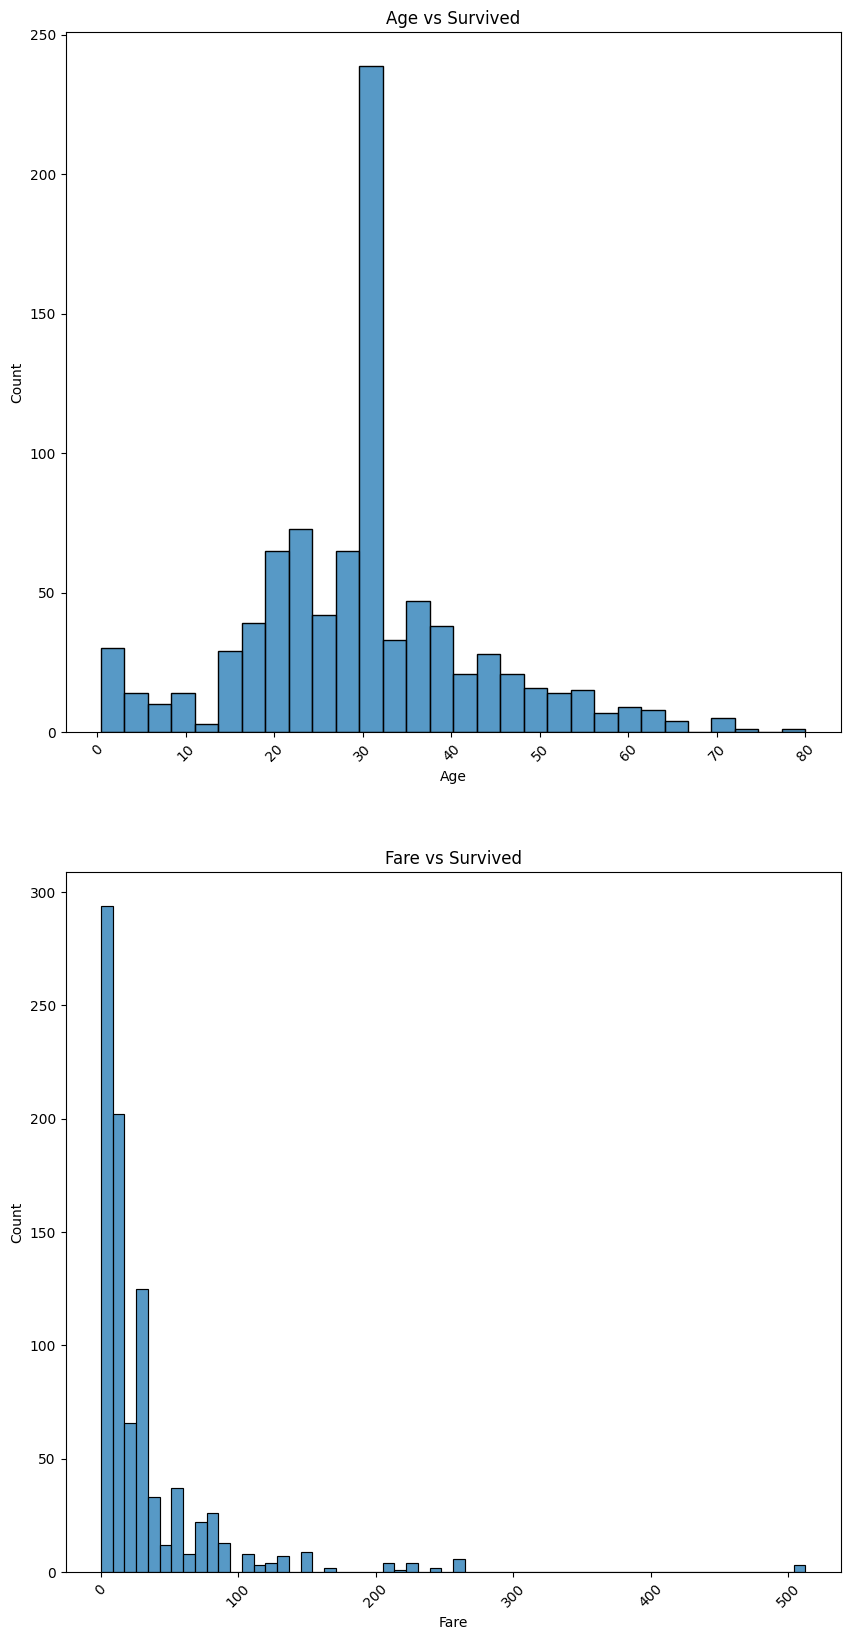

In [25]:
num_features=[col for col in train_df.columns if train_df[col].dtypes in ['int','float'] and col!='Survived']  
print(num_features)
fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 4*len(features)))
for i,col in enumerate(num_features):
    sns.histplot(train_df[col],ax=axes[i])
    axes[i].set_title(f'{col} vs Survived')
    axes[i].tick_params(axis='x', rotation=45)

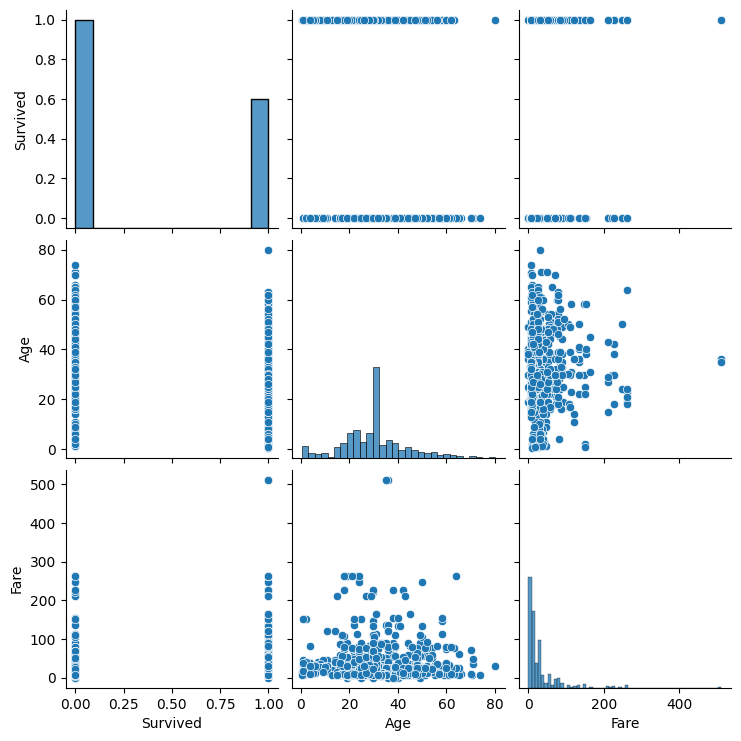

In [26]:
sns.pairplot(train_df)

In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
# changing the catagorical text to numerical columns AS Encoding

In [29]:
LE=LabelEncoder()

In [30]:
train_df['Sex']=LE.fit_transform(train_df['Sex'])

In [31]:
train_df['Embarked']=LE.fit_transform(train_df['Embarked'])

In [32]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [33]:
# Scaling the columns

In [34]:
SS=StandardScaler()

In [35]:
train_df['Age']=SS.fit_transform(train_df[['Age']])

In [36]:
train_df['Fare']=SS.fit_transform(train_df[['Fare']])

In [37]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


In [38]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,2
1,1,1,0,0.638789,1,0,0.786845,0
2,1,3,0,-0.284663,0,0,-0.488854,2
3,1,1,0,0.407926,1,0,0.420730,2
4,0,3,1,0.407926,0,0,-0.486337,2
5,0,3,1,0.000000,0,0,-0.478116,1
6,0,1,1,1.870059,0,0,0.395814,2
7,0,3,1,-2.131568,3,1,-0.224083,2
8,1,3,0,-0.207709,0,2,-0.424256,2
9,1,2,0,-1.208115,1,0,-0.042956,0


In [39]:
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [41]:
DT=DecisionTreeClassifier(max_depth=4)

In [42]:
DT_model=DT.fit(X_train,y_train)

In [43]:
DT_acc=cross_val_score(DT_model,X,y,cv=4)

In [44]:
DT_acc.mean()*100

np.float64(80.47509392800872)

## XGBoostCLassifier

In [45]:
XGB=XGBClassifier(tree_method="hist",  # required for categorical
    enable_categorical=True)

In [46]:
XGB_model=XGB.fit(X_train,y_train)

In [47]:
XGB_y_pred=XGB_model.predict(X_test)

In [48]:
#cross validation score
XGB_acc=cross_val_score(XGB_model,X,y,cv=5)

In [49]:
XGB_acc.mean()

np.float64(0.8137216747222397)

In [50]:
print(classification_report(y_test,XGB_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       110
           1       0.81      0.61      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179



In [51]:
XGB_y_train_pred=XGB_model.predict(X_train)

In [52]:
print(classification_report(y_train,XGB_y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       439
           1       0.99      0.95      0.97       273

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

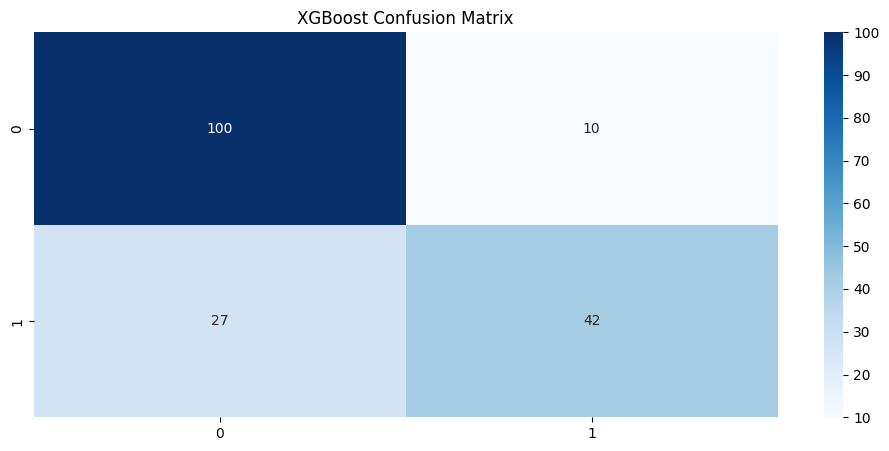

In [53]:
# confusion matrix
plt.figure(figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, XGB_y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")

## LGBM

In [54]:
d_train=lgm.Dataset(X_train,label=y_train)

In [55]:
params={"learning_rate": 0.05,"boosting_type": "gbdt", "n_estimators": 500,"objective": "binary","max_depth": -1,"metric": "auc"}

In [56]:
lgm_model=lgm.train(params,d_train,100)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [57]:
lgm_y_pred=lgm_model.predict(X_test)

In [58]:
predictions=[round(value) for value in lgm_y_pred]

In [59]:
len(y_test)

179

In [60]:
len(predictions)

179

In [61]:
accuracy=accuracy_score(y_test,predictions)

In [62]:
accuracy

0.7877094972067039

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.78      0.62      0.69        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [64]:
lgm_model=lgm.LGBMClassifier(random_state=42)

In [65]:
lgm_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [66]:
lgm_acc=cross_val_score(lgm_model,X,y,cv=5)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [67]:
print("Cross-validation scores:", lgm_acc)
print("Mean CV score:", np.mean(lgm_acc))


Cross-validation scores: [0.77094972 0.81460674 0.85393258 0.80337079 0.85955056]
Mean CV score: 0.8204820789655389


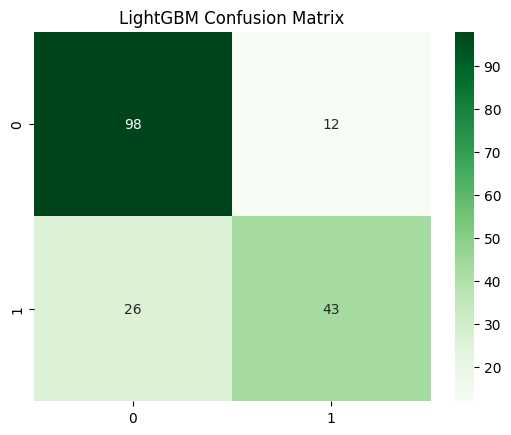

In [68]:
# confusion matric
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Greens")
plt.title("LightGBM Confusion Matrix")
plt.show()


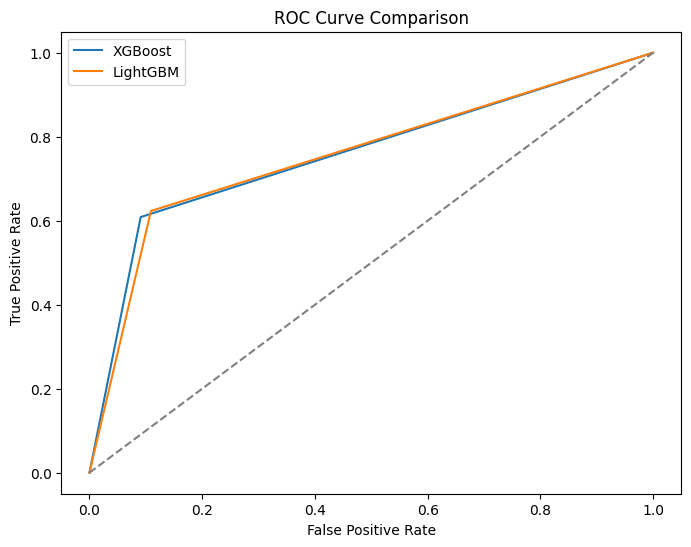

In [71]:
# ROC AUC Curve
# Probabilities
y_prob_xgb = XGB_model.predict_proba(X_test)[:,1]
y_prob_lgb = lgm_model.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, XGB_y_pred)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, predictions)
plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot(fpr_lgb, tpr_lgb, label="LightGBM")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


**Interpretation**:
* Both the models are having accuracy and F1 score are almost same.
* XGBoost:
  * It is little better in precision for minority class(fewer false alarms).
  * It is better recall for majority class
* LightGBM:
  * It is little better recal for minority class (catches more +ves)

### Strengths & Weaknesses
**XGBoost**

* Strengths:
  1. Slightly better at very low false positive rates.
  2. Stable performance across thresholds.
  3. Well-suited if the problem requires high precision (minimizing false alarms).

* Weaknesses:
  1. Slightly lower curve than LightGBM at mid/high thresholds → can lag in recall when tolerance for false positives increases.
  2. Computationally heavier than LightGBM in many cases.


**LightGBM**

* Strengths:
  1. Slightly higher ROC curve in the mid/upper range → better recall when you allow some false positives.
  2. Often trains faster and uses less memory than XGBoost.
  3. Good at handling large datasets with many features.

* Weaknesses:
  1. At very strict thresholds (low FPR), XGBoost edges it out.
  2. Can sometimes be more sensitive to hyperparameter tuning compared to XGBoost.


# Titanic_test.csv Data 

In [72]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [74]:
test_df.shape

(418, 7)

In [75]:
test_df.duplicated().sum()

np.int64(38)

In [76]:
test_df.drop_duplicates(inplace=True)

In [77]:
test_df.reset_index(drop=True,inplace=True)

In [78]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [79]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [80]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [81]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [82]:
test_df.shape

(380, 7)

In [83]:
test_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [84]:
X.dtypes

Pclass      category
Sex            int64
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked       int64
dtype: object

In [85]:
test_df['Sex']=LE.fit_transform(test_df['Sex'])

In [86]:
test_df['Embarked']=LE.fit_transform(test_df['Embarked'])

In [87]:
test_df['Pclass']=test_df['Pclass'].astype('category')
test_df['SibSp']=test_df['SibSp'].astype('category')
test_df['Parch']=test_df['Parch'].astype('category')

In [88]:
test_df.dtypes

Pclass      category
Sex            int64
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked       int64
dtype: object

In [89]:
y_test_df_pred=XGB_model.predict(test_df)

In [90]:
Survived=pd.DataFrame(y_test_df_pred,columns=['Survived'])

In [91]:
test_df_result=pd.concat([test_df,Survived],axis=1,)

In [92]:
test_df_result

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.500000,0,0,7.8292,1,0
1,3,0,47.000000,1,0,7.0000,2,0
2,2,1,62.000000,0,0,9.6875,1,0
3,3,1,27.000000,0,0,8.6625,2,0
4,3,0,22.000000,1,1,12.2875,2,0
...,...,...,...,...,...,...,...,...
375,1,0,37.000000,1,0,90.0000,1,1
376,3,0,28.000000,0,0,7.7750,2,0
377,1,0,39.000000,0,0,108.9000,0,1
378,3,1,38.500000,0,0,7.2500,2,0
